# Programming Problem: Model Comparison among Logistic Regression, Linear SVM and Gaussian Kernel SVM 

In this problem, you are expected to implement and compare three models: (1) logistic regression, (2) a linear SVM, (3) a Gaussian kernel SVM. In this assignment, you are allowed to use the sklearn packages.

**Data**: we provide binary classification dataset camel_train.cvs and camel_test.cvs for training and testing respectively (these files are both in hw3_data_files.zip). The model is trained on training set, you are supposed to report accuracy both on the training set and on the test set. Each sample consists of input features $x^{(i)} \in \mathbb{R}^2$ and class lables $y^{(i)} \in \{-1, 1\}$. Note that here the labels are $\{-1,+1\}$ valued rather than $\{0,1\}$ valued for convenience.

**Problem (a) [5 points]** Visualize the training data in 2D space in Sec 1.1 and estimate or guess based on visualization which classifier you think will be most suitable for the dataset, and explain why. Write down this estimation {\bf before} you start your implementation and testing, and this is what you'll also turn in. Note that you will not be penalized for getting the wrong answer here, the main thing we would like to see is your prediction and your clear justification why. 

**Problem (b) [10 points]** Implement a function in Sec 1.2 that can learn the Logistic Regression, Linear SVM, Gaussian kernel SVM models by setting the appropriate model type.

**Problem (e) [5 points]** Report the accuracy of each model and explain why one method is superior to the others (that is, fill in Sec 1.3).

**Problem (c) [5 points]** Discuss how the decision boundary of each model looks like in 2D space and why. Please be very clear and precise in your discussion. 

**Problem (d) [10 points]** Fill in the code to visualize the decision boundary of the learned model in Sec 1.4. Do they follow your assumptions and guesses above? If so, explain why the experiment confirmed your hypothesis. If the models did not behave consistently with your expectations explain why, and most importantly, explain how your hypotheses were adjusted and critically what you learned from this experiment.






In [1]:
# Import Modules
import sklearn
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# Load dataset
# Read in the csv
df_train=pd.read_csv('camel_train.csv', encoding='utf-8')
df_test = pd.read_csv('camel_test.csv', encoding='utf-8')
# Difference between white rating and black rating - independent variable
df_train.head()

,0.566992416097,0.84059391133,-1.0
0,0.297289,0.791696,-1.0
1,1.030462,0.429955,1.0
2,0.311769,0.867175,-1.0
3,0.883618,0.397090,1.0
4,0.362195,0.880017,1.0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   0.566992416097  99 non-null     float64
 1   0.84059391133   99 non-null     float64
 2   -1.0            99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


In [4]:
df_train.describe()

,0.566992416097,0.84059391133,-1.0
count,99.000000,99.000000,99.000000
mean,0.482068,0.694767,0.212121
std,0.277511,0.168909,0.982217
min,0.019830,0.363592,-1.000000
25%,0.230922,0.570406,-1.000000
50%,0.467246,0.691494,1.000000
75%,0.682227,0.848954,1.000000
max,1.041663,0.979701,1.000000


In [5]:
# Select rating difference and turns as feature to predict the label
# training set
x_train = df_train.iloc[:, [0,1]].to_numpy()
y_train = df_train.iloc[:, 2].to_numpy()

# testing set
x_test = df_test.iloc[:, [0,1]].to_numpy()
y_test = df_test.iloc[:, 2].to_numpy()


blue: label -1
red : label 1


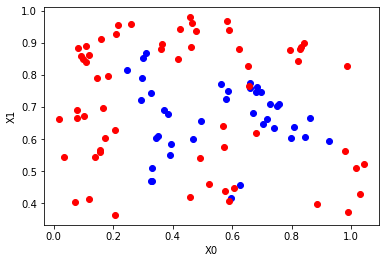

Problem 4(a)
Q) which classifier you think will be most suitable for the dataset?
--> I think Gaussian kernel SVM would be the most suitable for the dataset because label '-1' is centered in the dataset which looks like Gaussian distribution. Other linear model would have a lot of mis-classified training data


In [6]:
#@title Sec 1.1
# visualize training set in 2D space
# TODO
print("blue: label -1")
print("red : label 1")
r1 = np.where(y_train == -1)
r2 = np.where(y_train == 1)
plt.plot(x_train[r1, 0], x_train[r1, 1], 'o', color='blue'); # -1 class
plt.plot(x_train[r2, 0], x_train[r2, 1], 'o', color='red'); # 1 class
plt.xlabel("X0")
plt.ylabel("X1");
plt.show()

print("Problem 4(a)")
print("Q) which classifier you think will be most suitable for the dataset?")
print("--> I think Gaussian kernel SVM would be the most suitable for the dataset \
because label '-1' is centered in the dataset which looks like Gaussian distribution. \
Other linear model would have a lot of mis-classified training data")

In [15]:
#@title Sec 1.2
print("Problem 4(b) - implementation")
# Train logistic regression and print accuracy
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
# define training procedure for logistic regression and svm
def training(x_train, y_train, x_test, y_test, model_type = 'logistic', kernel=None):
    # specify the model used to learn by model_type
    # model_type == 'logistic' -> using logistic regression model
    if (model_type is 'logistic'):
        model = LogisticRegression().fit(x_train, y_train)
    # model_type == 'svm' --> using SVM model
    if (model_type is 'svm'):
        if (kernel is None): # kernel == None  --> using linear kenel for SVM
            model = svm.SVC(kernel="linear").fit(x_train, y_train)
        elif (kernel is 'rbf'): # kernel == 'rbf' --> using gaussian kernel for SVM
            model = svm.SVC(kernel="rbf").fit(x_train, y_train)
    # define models
    # TODO
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    return model, acc_train, acc_test

Problem 4(b) - implementation


In [16]:
#@title Sec 1.3
# train logistic regression
# TODO
print("\nProblem 4(c)")
model_LR, acc_train, acc_test = training(x_train, y_train, x_test, y_test, model_type='logistic', kernel=None)  
print("logistic regression\n  --> accuracy_train: {}, accuracy_test: {} ".format(acc_train, acc_test))

# train linear SVM
# TODO
model_SVM, acc_train, acc_test = training(x_train, y_train, x_test, y_test, model_type='svm', kernel=None)  
print("linear SVM\n  --> accuracy_train: {}, accuracy_test: {} ".format(acc_train, acc_test))

# train Gaussian SVM
# TODO
model_K_SVM, acc_train, acc_test = training(x_train, y_train, x_test, y_test, model_type='svm', kernel="rbf")  
print("Gaussian kernel SVM\n  --> accuracy_train: {}, accuracy_test: {} ".format(acc_train, acc_test))

print("Q) explain why one method is superior to the others")
print(" --> Gaussian kernel SVM gives the best accuracy because dataset looks like kernel and linearly inseperable.\
'1' labels are surround to '-1' labels which are centered in the middle.")



Problem 4(c)
logistic regression
  --> accuracy_train: 0.5555555555555556, accuracy_test: 0.531328320802005 
linear SVM
  --> accuracy_train: 0.6060606060606061, accuracy_test: 0.5639097744360902 
Gaussian kernel SVM
  --> accuracy_train: 0.8585858585858586, accuracy_test: 0.7192982456140351 
Q) explain why one method is superior to the others
 --> Gaussian kernel SVM gives the best accuracy because dataset looks like kernel and linearly inseperable.'1' labels are surround to '-1' labels which are centered in the middle.


In [17]:
print("Problem 4(d)")
print("Q) Discuss how the decision boundary of each model looks like in 2D space and why.")
print("\nlogistic regression: The boundary would be linear because it's default model and I didn't change features or parameters to make them non-linear.")
print("\nlinear SVM: Since it is linear SVM, the boundary would be linear.")
print("\nGaussian kernel SVM: It will have boundary looks like ellipsis or cirlce because Gaussian kernel separates center and outside of kernel ")


Problem 4(d)
Q) Discuss how the decision boundary of each model looks like in 2D space and why.

logistic regression: The boundary would be linear because it's default model and I didn't change features or parameters to make them non-linear.

linear SVM: Since it is linear SVM, the boundary would be linear.

Gaussian kernel SVM: It will have boundary looks like ellipsis or cirlce because Gaussian kernel separates center and outside of kernel 


In [18]:
from itertools import product
# Sec 1.4 plot decision boundary for learned models
class_colors = {-1: 'b', 1: 'r'}    
def plot_decision_boundary(model, x, y, title='', output_path=None,
        file_name=None, class_colors={-1: 'b', 1: 'r'}, model_type= 'svm' ):
    colors = y > 0 if class_colors is None else [class_colors[c] for c in y]
    fig = plt.figure()
    plt.scatter(x[:, 0], x[:, 1], c=colors)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # TODO
    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.contourf(XX, YY, Z, alpha=0.4)
    #plt.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="k")

    plt.title(title)
    plt.show()
    if output_path is not None and file_name is not None:
        fig.savefig(os.path.join(output_path, file_name))

Problem 4(e)


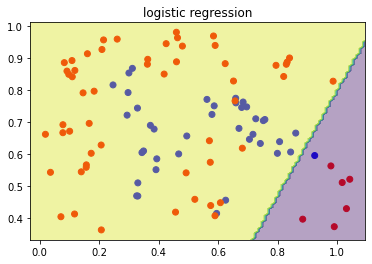

In [19]:
# plot decision boundary for logistic regression
# TODO
print("Problem 4(e)")
plot_decision_boundary(model_LR, x_train, y_train, title="logistic regression", model_type='logistic')



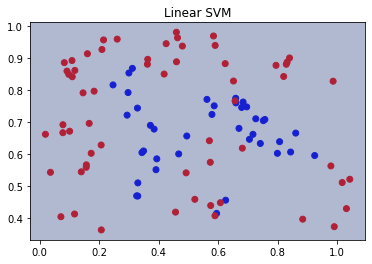

In [20]:
# plot decision boundary for linear svm
# TODO
plot_decision_boundary(model_SVM, x_train, y_train, title="Linear SVM", model_type='svm')


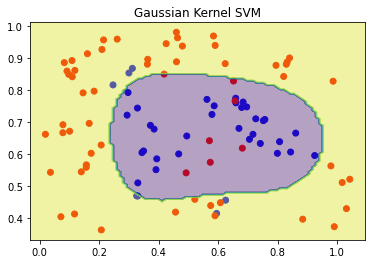

In [21]:
# plot decision boundary for linear svm
# TODO
plot_decision_boundary(model_K_SVM, x_train, y_train, title="Gaussian Kernel SVM", model_type='rbf')



In [22]:
print("Q) Do they follow your assumptions and guesses above?")
print("--> Yes")
print("Q) critically what you learned from this experiment?")
print("--> If we choose incorrect model, we get poor accuracy. \
In this example, I learned that I should not fit the linearly not sperated dataset to linear model \
and selecting correct model is veray important")



Q) Do they follow your assumptions and guesses above?
--> Yes
Q) critically what you learned from this experiment?
--> If we choose incorrect model, we get poor accuracy. In this example, I learned that I should not fit the linearly not sperated dataset to linear model and selecting correct model is veray important
